# WIE3007 Data Mining Project

Predictive Model Development (Logistic Regression)
*   Name : Nasrin Ameera Binti Mohammad Zabri
*   Matrics Num : 22002363

1. Import required libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

2. Load model-ready dataset

In [2]:
X = pd.read_csv("X_features.csv")
y = pd.read_csv("y_target.csv")

In [3]:
print(X.shape)
print(y.value_counts())

(1200, 45)
churn
0        925
1        275
Name: count, dtype: int64


3. Train-test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

4. Feature Scaling

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

5. Train Logistic Regression Model

In [6]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

6. Model Predictions

In [7]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

7. Model Evaluation Metrics (Accuracy, F1, ROC-AUC)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.9958
F1-score: 0.9910
ROC-AUC: 0.9999


8. Confusion Matrix

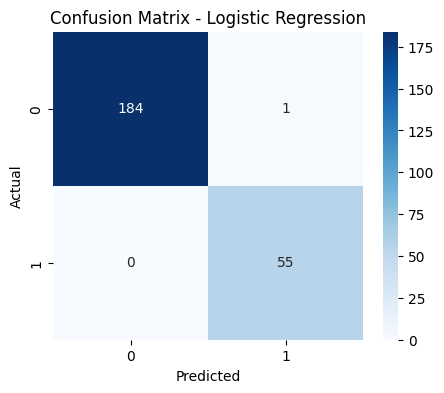

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

9. ROC Curve

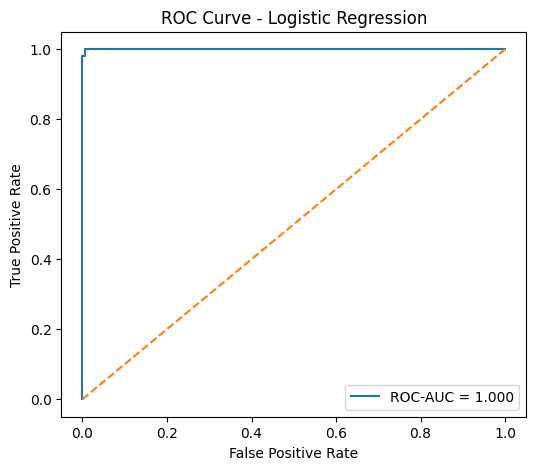

In [10]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

10. Feature Importance

In [11]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
})

feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(
    by="Abs_Coefficient",
    ascending=False
)

feature_importance.head(10)

,Feature,Coefficient,Abs_Coefficient
22,churn_probability,5.715324,5.715324
9,email_open_rate,-2.464206,2.464206
21,order_frequency_per_month,-0.350542,0.350542
20,total_spent_per_day,0.333268,0.333268
7,days_since_last_login,0.240179,0.240179
1,account_age_days,0.236466,0.236466
25,avg_transaction_value,-0.220484,0.220484
5,avg_order_value,-0.220457,0.220457
26,max_transaction_value,0.217985,0.217985
2,recency,0.211773,0.211773


*Plot Top Features

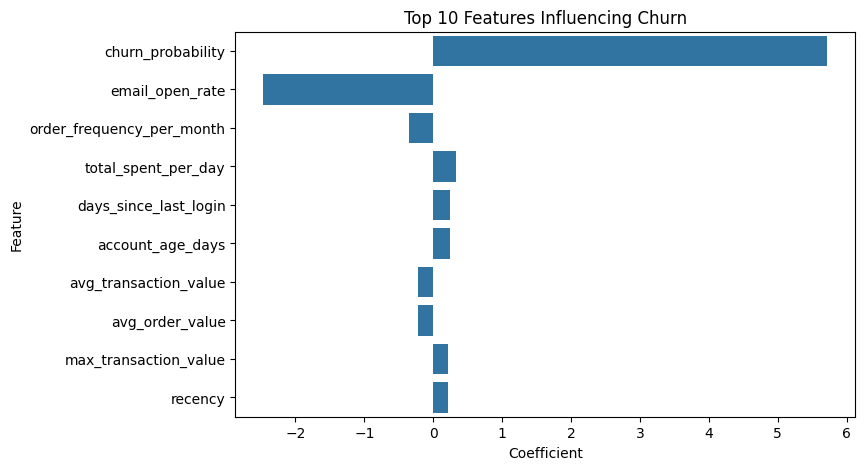

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=feature_importance.head(10),
    x="Coefficient",
    y="Feature"
)
plt.title("Top 10 Features Influencing Churn")
plt.show()

**Model Interpretation**

Logistic Regression provides interpretable coefficients indicating the direction and strength
of each feature’s influence on churn. Features with higher absolute coefficients have stronger
predictive power. Positive coefficients increase churn likelihood, while negative coefficients
are associated with customer retention.